<h1 style="text-align: center;">Discrete Convolution</h1>
<p style="text-align: center;">Lab 3</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with convolution and its properties using Python.

### 2. Deliverables Overview 
##### Part 1
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**, **Task 3**, and **Task 4**.  
[ ] Code and plots for **Task 5**.

### 3. Part 1
##### 3.1 Purpose
Use the step and ramp functions developed in **Lab 2** to write functions to use in the rest of this lab.
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$f_1(t) = u(t - 2) - u(t - 9)$$  
$$f_2(t) = e^{-t}u(t)$$  
$$f_3(t) = r(t - 2)[u(t - 2) - u(t - 3)] + r(4 - t)[u(t - 3) - u(t - 4)]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
steps = 1e-2
t = np.arange(0, 20 + steps, steps)

def step(t):
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            y[i] = 0
        else:
            y[i] = 1
    return y

def ramp(t):
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            y[i] = 0
        else:
            y[i] = t[i]
    return y


def func1(t):
    y = step(t-2)-step(t-9)
    return y

def func2(t):
    y = np.exp(-t)*step(t)
    return y

def func3(t):
    y = ramp(t-2)*(step(t-2)-step(t-3))+ramp(4-t)*(step(t-3)-step(t-4))
    return y

2. Plot the three functions in a single figure, seperate subplots, from $0 \le t \le 20$ s with time steps small enough to achieve appropriate resolution.

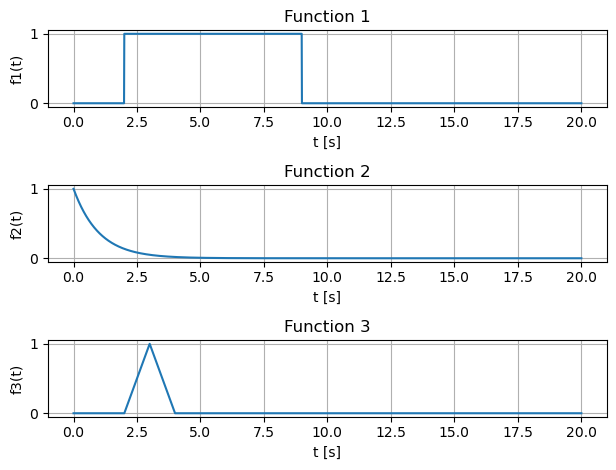

In [4]:
f1 = func1(t)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, f1)
plt.grid()
plt.ylabel("f1(t)")
plt.xlabel("t [s]")
plt.title("Function 1")

f2 = func2(t)

plt.subplot(3, 1, 2)
plt.plot(t, f2)
plt.grid()
plt.ylabel("f2(t)")
plt.xlabel("t [s]")
plt.title("Function 2")

f3 = func3(t)

plt.subplot(3, 1, 3)
plt.plot(t, f3)
plt.grid()
plt.ylabel("f3(t)")
plt.xlabel("t [s]")
plt.title("Function 3")
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Create code to perform the convolution of two functions. Verify this code with Python's built-in convolution tools.
##### 4.2 Tasks
1. Write your own code to perform convolution. Describe the functionality of your code thoroughly in the function description and using comments where appropriate. *Note: Recall that the duration of a convolution is the sum of the duration of each function convolved. Adjust your plot window sizes and time vectors appropriately. Hint: You will not have to use the numpy integrate function, think back to how you first learned integrals.

In [8]:
def convolve(f1, f2):
    
    Nf1 = len(f1)
    Nf2 = len(f2)
    f1Extended = np.append(f1, np.zeros((1, Nf2-1)))
    f2Extended = np.append(f2, np.zeros((1, Nf1-1)))
    result = np.zeros(f1Extended.shape)

    for i in range(Nf1+Nf2-1):
        result[i] = 0
        for j in range(Nf1):
            if i-j >= 0 and i-j < Nf2:
                result[i]+=f1Extended[j]*f2Extended[i-j]
    return result

2. Plot the convolution of $f_1$ and $f_2$.

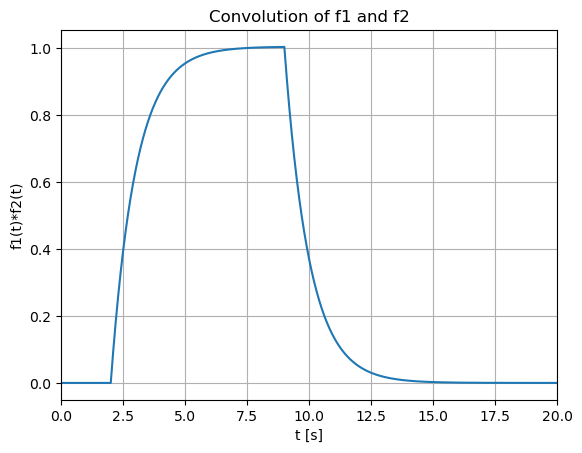

In [20]:
steps = 1e-2
t = np.arange(0, 20+steps, steps)
n = len(t)

y = convolve(f1, f2)*steps
t_extend = np.arange(0, 2*t[n-1], steps)

plt.figure()
plt.plot(t_extend, y)
plt.grid()
plt.ylabel("f1(t)*f2(t)")
plt.xlabel("t [s]")
plt.xlim([0, 20])
plt.title("Convolution of f1 and f2")
plt.show()

3. Plot the convolution of $f_2$ and $f_3$.

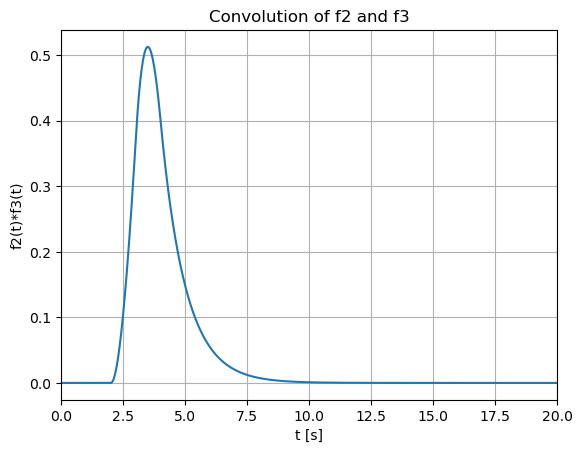

In [25]:
y = convolve(f2, f3)*steps
t_extend = np.arange(0, 2*t[n-1], steps)

plt.figure()
plt.plot(t_extend, y)
plt.grid()
plt.ylabel("f2(t)*f3(t)")
plt.xlabel("t [s]")
plt.xlim([0, 20])
plt.title("Convolution of f2 and f3")
plt.show()

4. Plot the convolution of $f_1$ and $f_3$.

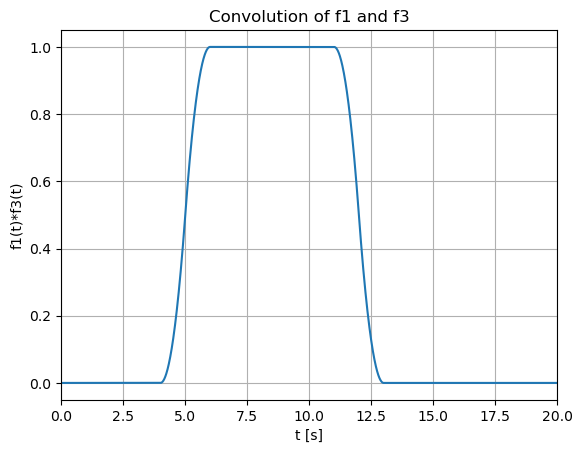

In [27]:
y = convolve(f1, f3)*steps
t_extend = np.arange(0, 2*t[n-1], steps)

plt.figure()
plt.plot(t_extend, y)
plt.grid()
plt.ylabel("f1(t)*f3(t)")
plt.xlabel("t [s]")
plt.xlim([0, 20])
plt.title("Convolution of f1 and f3")
plt.show()

5. Verify your convolution function is working correctly using the **scipy.signal.convolve()** function by plotting the convolutions from **Task 2**, **Task 3**, and **Task 4** in one figure with three subplots.

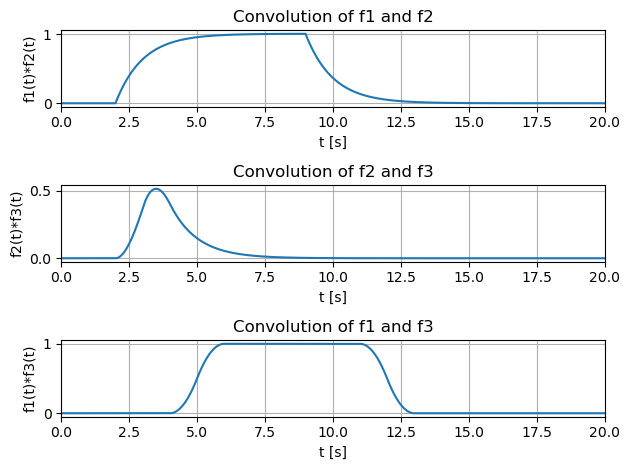

In [35]:
import scipy

y1 = scipy.signal.convolve(f1, f2)*steps
y2 = scipy.signal.convolve(f2, f3)*steps
y3 = scipy.signal.convolve(f1, f3)*steps
t_extend = np.arange(0, 2*t[n-1], steps)

plt.figure
plt.subplot(3, 1, 1)
plt.plot(t_extend, y1)
plt.grid()
plt.ylabel("f1(t)*f2(t)")
plt.xlabel("t [s]")
plt.xlim([0, 20])
plt.title("Convolution of f1 and f2")

plt.subplot(3, 1, 2)
plt.plot(t_extend, y2)
plt.grid()
plt.ylabel("f2(t)*f3(t)")
plt.xlabel("t [s]")
plt.xlim([0, 20])
plt.title("Convolution of f2 and f3")

plt.subplot(3, 1, 3)
plt.plot(t_extend, y3)
plt.grid()
plt.ylabel("f1(t)*f3(t)")
plt.xlabel("t [s]")
plt.xlim([0, 20])
plt.title("Convolution of f1 and f3")
plt.tight_layout()
plt.show()

### 5. Questions
1. Did you work alone or with classmates on this lab? If you collaborated to get to the solution, what did that process look like?    
>I had to collaborate with classmates to complete this lab. I had typed out my code alone at first and then asked for feedback from a few classmates to see where I was going wrong.
2. What was the most difficult part of this lab for you, and what did your problem-solving process look like? 
>The most difficult part of this lab was troubleshooting the manual convolution function from part 2, step 1. My problem solving process mainly consisted of comparing my code to my classmates and seeing what they did differently.
3. Did you approach writing the code with analytical or graphical convolution in mind? Why did you chose this approach?
>I approached writing this code with graphical convolution in mind since an analytical approach would require the use of integrals (which would have been more difficult to manually do).
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>This lab felt very clear in its instructions. Any help that was needed was provided during the lab either by classmates or the lab TA.